In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pivottablejs import pivot_ui
import numpy as np

%matplotlib inline

std = pd.read_csv('STD_Cases.csv')
pd.set_option('float_format', '{:f}'.format)
std

,index,Disease,Disease Code,State,Year,Gender,Age,Age Code,STD Cases,Population,Rate per 100K
0,0,Chlamydia,274.000000,Alabama,1996.000000,Male,0-14 years,0-14,25.000000,468394.000000,5.340000
1,1,Chlamydia,274.000000,Alabama,1996.000000,Male,15-19 years,15-19,164.000000,165920.000000,98.840000
2,2,Chlamydia,274.000000,Alabama,1996.000000,Male,20-24 years,20-24,193.000000,152848.000000,126.270000
3,3,Chlamydia,274.000000,Alabama,1996.000000,Male,25-29 years,25-29,88.000000,152778.000000,57.600000
4,4,Chlamydia,274.000000,Alabama,1996.000000,Male,30-34 years,30-34,55.000000,155850.000000,35.290000
...,...,...,...,...,...,...,...,...,...,...,...
42675,42675,NaN,nan,NaN,nan,NaN,NaN,NaN,nan,nan,nan
42676,42676,NaN,nan,NaN,nan,NaN,NaN,NaN,nan,nan,nan
42677,42677,NaN,nan,NaN,nan,NaN,NaN,NaN,nan,nan,nan
42678,42678,NaN,nan,NaN,nan,NaN,NaN,NaN,nan,nan,nan


In [2]:
std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42680 entries, 0 to 42679
Data columns (total 11 columns):
index            42680 non-null int64
Disease          42530 non-null object
Disease Code     42530 non-null float64
State            42530 non-null object
Year             42530 non-null float64
Gender           42530 non-null object
Age              42530 non-null object
Age Code         42530 non-null object
STD Cases        42530 non-null float64
Population       35483 non-null float64
Rate per 100K    35483 non-null float64
dtypes: float64(5), int64(1), object(5)
memory usage: 3.6+ MB


In [3]:
#Let's check for Columns with NaN values

#std.isnull().values.any() you can this or 

std.isnull().sum()

index               0
Disease           150
Disease Code      150
State             150
Year              150
Gender            150
Age               150
Age Code          150
STD Cases         150
Population       7197
Rate per 100K    7197
dtype: int64

In [4]:
#Lets drop all the nan values
std = std.dropna(subset=['Disease', 'Disease Code', 'Population'])
std.isnull().sum() #We've successfully drop all the nan values

index            0
Disease          0
Disease Code     0
State            0
Year             0
Gender           0
Age              0
Age Code         0
STD Cases        0
Population       0
Rate per 100K    0
dtype: int64

In [5]:
#it's expedient to have a look on the data we can working on.

#If you look through the above line you will see we have 42680 x 11 and after dropping the nan values we have a 35483 x11
std.shape

(35483, 11)

In [7]:
#I don't feel comfortable with the .0  in this some of the columns, lets drop it so as to give a stunning look to our 
#data. But you can ignore as it is not neccessary.

std['Disease Code'] = std['Disease Code'].astype(str).apply(lambda x: x.replace('.0', ''))
std['Population'] = std['Population'].astype(str).apply(lambda x: x.replace('.0', ''))
std['STD Cases'] = std['STD Cases'].astype(str).apply(lambda x: x.replace('.0', ''))
std['Year'] = std['Year'].astype(str).apply(lambda x: x.replace('.0', ''))
std

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,index,Disease,Disease Code,State,Year,Gender,Age,Age Code,STD Cases,Population,Rate per 100K
0,0,Chlamydia,274,Alabama,1996,Male,0-14 years,0-14,25,468394,5.340000
1,1,Chlamydia,274,Alabama,1996,Male,15-19 years,15-19,164,165920,98.840000
2,2,Chlamydia,274,Alabama,1996,Male,20-24 years,20-24,193,152848,126.270000
3,3,Chlamydia,274,Alabama,1996,Male,25-29 years,25-29,88,152778,57.600000
4,4,Chlamydia,274,Alabama,1996,Male,30-34 years,30-34,55,155850,35.290000
...,...,...,...,...,...,...,...,...,...,...,...
42625,42625,Primary and Secondary Syphilis,310,Wyoming,2004,Female,30-34 years,30-34,1,14577,6.860000
42626,42626,Primary and Secondary Syphilis,310,Wyoming,2007,Female,40+ years,40+,1,123292,0.810000
42627,42627,Primary and Secondary Syphilis,310,Wyoming,2008,Female,20-24 years,20-24,1,18026,5.550000
42628,42628,Primary and Secondary Syphilis,310,Wyoming,2008,Female,30-34 years,30-34,1,15691,6.370000


In [8]:
#Just wanted to see the brief of STD Cases by working with these columns and further more creating a new dataframe

# for index, row in std.iterrows():
#     print(index, row) or use the line of code below
    
df = std[['Disease', 'State', 'Gender', 'Age', 'Age Code', 'STD Cases', 'Disease Code']].sort_values('STD Cases', ascending = False)

df['Diease Code'] = pd.to_numeric(df['Disease Code'])
df['STD Cases'] = pd.to_numeric(df['STD Cases'])

df

,Disease,State,Gender,Age,Age Code,STD Cases,Disease Code,Diease Code
5373,Chlamydia,Oklahoma,Male,15-19 years,15-19,999,274,274
10663,Gonorrhea,Michigan,Male,30-34 years,30-34,999,280,280
25036,Chlamydia,Delaware,Female,20-24 years,20-24,999,274,274
12177,Gonorrhea,North Carolina,Male,30-34 years,30-34,999,280,280
37582,Gonorrhea,Tennessee,Female,15-19 years,15-19,999,280,280
...,...,...,...,...,...,...,...,...
10175,Gonorrhea,Maine,Male,40+ years,40+,1,280,280
40960,Primary and Secondary Syphilis,Nevada,Female,25-29 years,25-29,1,310,310
40959,Primary and Secondary Syphilis,Nebraska,Female,30-34 years,30-34,1,310,310
40958,Primary and Secondary Syphilis,Nebraska,Female,25-29 years,25-29,1,310,310


In [9]:
#I Will love to start asking questions, firstly let's ascertain the trend of this diseases
std['Disease'].value_counts().reset_index()

,index,Disease
0,Chlamydia,13512
1,Gonorrhea,13233
2,Primary and Secondary Syphilis,8738


In [10]:
std['Diease Code'] = pd.to_numeric(std['Disease Code'])
std['Population'] = pd.to_numeric(std['Population'])
std['STD Cases'] = pd.to_numeric(std['STD Cases'])
std['Year'] = pd.to_numeric(std['Year'])

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

# What state has the highest STD and why?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

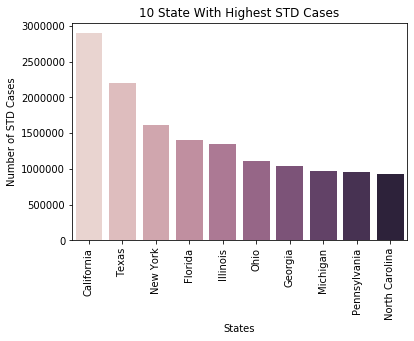

In [11]:
#We consider the first 10 states
state_std = std.groupby('State')['STD Cases'].sum().sort_values(ascending = False)[:10]
sns.barplot(state_std.index, state_std.values, palette=sns.cubehelix_palette(10))
plt.title('10 State With Highest STD Cases')
plt.xlabel('States')
plt.ylabel('Number of STD Cases')
plt.xticks(rotation = 90)

In [12]:
state_std_lo = std.groupby('State')['STD Cases'].sum().sort_values(ascending = False)[:51].reset_index()
state_std_lo.head(51) 

,State,STD Cases
0,California,2895329
1,Texas,2200298
2,New York,1614059
3,Florida,1400331
4,Illinois,1342213
5,Ohio,1113592
6,Georgia,1034040
7,Michigan,969172
8,Pennsylvania,951514
9,North Carolina,924102


## To find the possible reason why Carlifonia  has the highest and Vermot the lowest. Lets consider the age and gender distribution of people living in these States --------***

In [13]:
std['Gender'].value_counts()

Male      18132
Female    17351
Name: Gender, dtype: int64

In [14]:
std_gender = std.groupby('Gender')['STD Cases'].sum().sort_values(ascending = False)
std_gender

Gender
Female    17531171
Male       7907302
Name: STD Cases, dtype: int64

### More female (17531171) has STD than male (7907302) this is with a difference of (9623869)

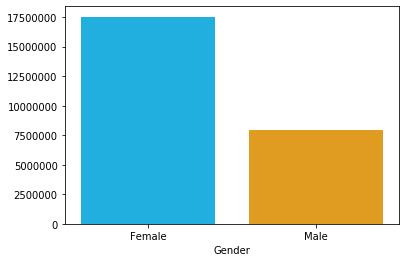

In [15]:
color = ['deepskyblue', 'orange']
sns.barplot(std_gender.index, std_gender.values, palette=color)
plt.ticklabel_format(style='plain', axis = 'y')

In [16]:
#Let
check = df.loc[(df['Disease'] == "Chlamydia") & (df['Gender']== 'Female') & (df['State'] == 'Texas') | (df['State'] == 'California') | 
                (df['State'] == 'New York') | (df['State'] == 'Florida') | (df['State'] == 'Vermont')]
pivot_gender = pd.pivot_table(check, index = ['Disease', 'State', 'Gender']).round()
pivot_gender

Diease Code    STD Cases
Disease                        State      Gender                          
Chlamydia                      California Female          274 12643.000000
                                          Male            274  5029.000000
                               Florida    Female          274  5620.000000
                                          Male            274  1821.000000
                               New York   Female          274  6719.000000
                                          Male            274  2523.000000
                               Texas      Female          274  9671.000000
                               Vermont    Female          274   115.000000
                                          Male            274    40.000000
Gonorrhea                      California Female          280  1674.000000
                                          Male            280  2195.000000
                               Florida    Female          280  1467.000000
                                          Male            280  1504.000000
                               New York   Female          280  1368.000000
                                          Male            280  1418.000000
                               Vermont    Female          280     6.000000
                                          Male            280     6.000000
Primary and Secondary Syphilis California Female          310    18.000000
                                          Male            310   230.000000
                               Florida    Female          310    20.000000
                                          Male            310   110.000000
                               New York   Female          310     6.000000
                                          Male            310   114.000000
                               Vermont    Female          310     1.000000
                                          Male            310     2.000000

In [17]:
pivot_age_gen = pd.pivot_table(df, values =['STD Cases'], index = ['Disease', 'Gender'], columns =['Age Code'],
                          aggfunc=np.sum)
pivot_age_gen

STD Cases                             \
Age Code                                   0-14    15-19    20-24    25-29   
Disease                        Gender                                        
Chlamydia                      Female    261478  5330173  5258512  1962281   
                               Male       31701  1065240  1717425   887805   
Gonorrhea                      Female     78777  1181215  1099890   475469   
                               Male       16867   561171   943764   586744   
Primary and Secondary Syphilis Female       358     5688     8674     6947   
                               Male         123     7360    27547    27736   

                                                               
Age Code                                30-34   35-39     40+  
Disease                        Gender                          
Chlamydia                      Female  769130  334840  286443  
                               Male    427293  224186  278098  
Gonorrhea                      Female  222059  118596  111676  
                               Male    358335  245025  398621  
Primary and Secondary Syphilis Female    6015    5378    7572  
                               Male     24008   23195   55058

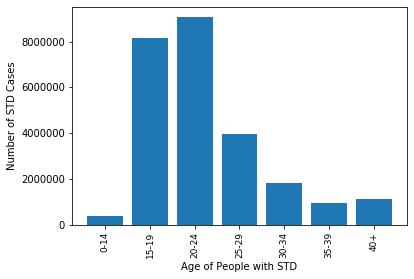

In [18]:
age_std = std.groupby('Age').sum()

age = [age for age, df in df.groupby('Age Code')]

plt.bar(age, age_std['STD Cases'])
plt.xticks(age, rotation = 'vertical', fontsize = 9)
plt.ylabel("Number of STD Cases")
plt.xlabel('Age of People with STD')
plt.show()

In [26]:
# From the question *** and the output above we can notice there are higher number of female and people in the age
# brancket of 15 to 34 indicate that people fall in this age and gender are Carriers(output 16), most of this people are found
# in California, Texas, New York. The age/gender that falls to the Vermont and Wyoming lesser carrier of STDs
# We can say the adult and teenagers in this states are practicing safe sex, taking treated and aware of this diseases.

In [20]:
std_age = std.groupby('Age')['STD Cases'].sum().sort_values(ascending = False)
std_age

Age
20-24 years    9055812
15-19 years    8150847
25-29 years    3946982
30-34 years    1806840
40+ years      1137468
35-39 years     951220
0-14 years      389304
Name: STD Cases, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

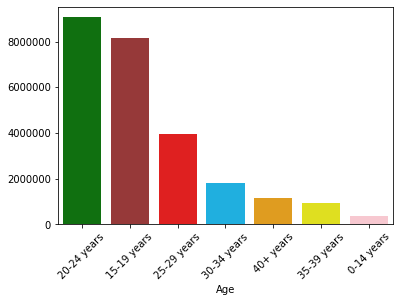

In [21]:
color = ['green', 'brown', 'red','deepskyblue', 'orange', 'yellow', 'pink']
sns.barplot(std_age.index, std_age.values, palette=color)
plt.xticks(rotation = 45)

### The above output shows that 20-24 to 30 - 34 has the highest STD Cases. 

In [22]:
pivot_df = df.loc[(df['Disease'] == 'Gonorrhea') &(df['Age Code'] >= '0') & (df['State'] == 'Texas')
                   | (df['State'] == 'California') | 
                (df['State'] == 'New York') | (df['State'] == 'Florida') | (df['State'] == 'Vermont')]
pivot_age = pd.pivot_table(pivot_df, index = ['Disease', 'State', 'Age Code']).round()
pivot_age

Diease Code    STD Cases
Disease                        State      Age Code                          
Chlamydia                      California 0-14              274   688.000000
                                          15-19             274 17449.000000
                                          20-24             274 22323.000000
                                          25-29             274 10762.000000
                                          30-34             274  5014.000000
...                                                         ...          ...
Primary and Secondary Syphilis Vermont    20-24             310     1.000000
                                          25-29             310     1.000000
                                          30-34             310     1.000000
                                          35-39             310     2.000000
                                          40+               310     3.000000

[90 rows x 2 columns]

# What is the trend of STD with respect with years?

In [23]:
std_year = std.groupby(['Year', 'Disease'])['STD Cases'].sum().reset_index()
std_year

,Year,Disease,STD Cases
0,1996,Chlamydia,475578
1,1996,Gonorrhea,320235
2,1996,Primary and Secondary Syphilis,11395
3,1997,Chlamydia,519194
4,1997,Gonorrhea,318220
5,1997,Primary and Secondary Syphilis,8529
6,1998,Chlamydia,598084
7,1998,Gonorrhea,351582
8,1998,Primary and Secondary Syphilis,7001
9,1999,Chlamydia,654337


### Considering the yearly trend you can notice that Chlamydia and Gonorrhea is on the rise each year that goes by. We recommend that medical agencies to increase awareness on STD, as the number of children who carries this diseases are on the rise.

In [24]:
# Let's check the distribution of age on state who has contracted any of these stds in percentage
pop1 = df.groupby(['State', 'Age'])['STD Cases'].agg({'Per cent' : 'sum'})
pop2 = pop1.groupby(level = 0).apply(lambda x: 100 * x / float(x.sum()))
pop2.sort_values('State', ascending=False)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  


Per cent
State   Age                  
Wyoming 40+ years    1.863544
        35-39 years  2.471970
        30-34 years  5.238587
        25-29 years 15.279532
        20-24 years 40.381893
...                       ...
Alabama 25-29 years 14.310535
        15-19 years 33.962900
        35-39 years  2.949441
        40+ years    3.856471
        0-14 years   1.797571

[357 rows x 1 columns]

In [25]:
pivot = pd.pivot_table(df, values ='STD Cases', index = ['Disease', 'Gender', 'State'], columns =['Age Code'],
                          aggfunc=np.sum)
pivot
# to view complete output enter this line of code pd.set_option('display.max_rows', 1000) or try
# pd.set_option('expand_frame_repr', False)

Age Code                                                    0-14  \
Disease                        Gender State                        
Chlamydia                      Female Alabama        6535.000000   
                                      Alaska          678.000000   
                                      Arizona        4236.000000   
                                      Arkansas       3265.000000   
                                      California    22747.000000   
...                                                          ...   
Primary and Secondary Syphilis Male   Virginia               nan   
                                      Washington             nan   
                                      West Virginia          nan   
                                      Wisconsin              nan   
                                      Wyoming                nan   

Age Code                                                    15-19  \
Disease                        Gender State                         
Chlamydia                      Female Alabama       118096.000000   
                                      Alaska         18126.000000   
                                      Arizona        98517.000000   
                                      Arkansas       59441.000000   
                                      California    539591.000000   
...                                                           ...   
Primary and Secondary Syphilis Male   Virginia         185.000000   
                                      Washington        65.000000   
                                      West Virginia      4.000000   
                                      Wisconsin         44.000000   
                                      Wyoming            2.000000   

Age Code                                                    20-24  \
Disease                        Gender State                         
Chlamydia                      Female Alabama       113112.000000   
                                      Alaska         18931.000000   
                                      Arizona       106180.000000   
                                      Arkansas       52980.000000   
                                      California    624307.000000   
...                                                           ...   
Primary and Secondary Syphilis Male   Virginia         608.000000   
                                      Washington       304.000000   
                                      West Virginia     24.000000   
                                      Wisconsin        150.000000   
                                      Wyoming            3.000000   

Age Code                                                    25-29  \
Disease                        Gender State                         
Chlamydia                      Female Alabama        36428.000000   
                                      Alaska          7807.000000   
                                      Arizona        44960.000000   
                                      Arkansas       17248.000000   
                                      California    270259.000000   
...                                                           ...   
Primary and Secondary Syphilis Male   Virginia         583.000000   
                                      Washington       381.000000   
                                      West Virginia     13.000000   
                                      Wisconsin        162.000000   
                                      Wyoming            5.000000   

Age Code                                                    30-34  \
Disease                        Gender State                         
Chlamydia                      Female Alabama        12606.000000   
                                      Alaska          3312.000000   
                                      Arizona        19453.000000   
                                      Arkansas        6066.000000   
       